<a href="https://colab.research.google.com/github/vickypandey07/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Vikram_Pandey_Capstone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#libraries import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Data set loading and storing in data frame
df = pd.read_csv('/content/drive/MyDrive/capstone_project_csvfiles/Hotel Bookings.csv')

In [3]:
#first 10 rows printing using head method
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
#last ten rows printing using tail method
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
#finding shape of dataframe 
df.shape

(119390, 32)

In [6]:
#using info for basic info of dataset
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#checking datatypes of columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##There are  four columns having datatype float ,sixteen having datatype int,and  twelve object datatype

In [8]:
#using columns attribute to print columns of dataset
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [9]:
#checking for null values in dataset
df.isnull().sum().sort_values()

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

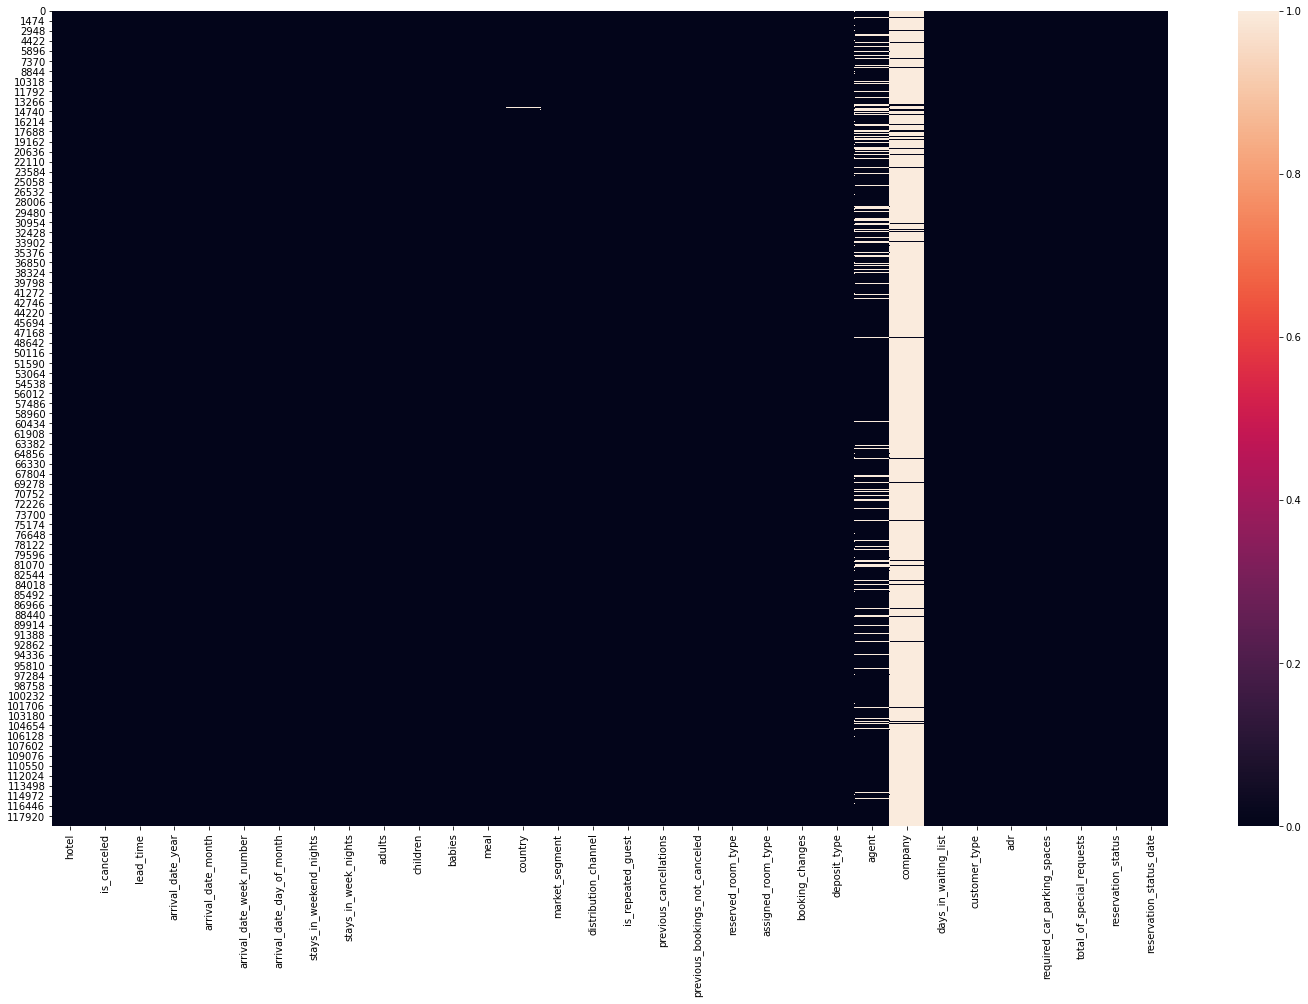

In [10]:
# Heatmap plotting of null values

fig,axes = plt.subplots(1,1,figsize=(25,15))
sns.heatmap(df.isna())
plt.show()

In [11]:
#percentage of null values in dataset 
print(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False))

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
is_canceled                        0.000000
market_segment                     0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
babies                             0.000000
meal                               0.000000
reservation_status_date            0.000000
distribution_channel               0.000000
reservation_status                 0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type              

## Key Points:

# 1.Columns which contains null values are agent, company, children and country.

# 2. Approximately, there are 94% company column and 13% agent column filled with null values.

In [12]:
# we need to make of a copy of dataset for handling the null values

df_new = df.copy()

## we will replace all null values with 0 as Columns like Agent and Company have maximum number of null values as compared to other columns, because these are not missing values instead they will be considered as "Not Applicable".

In [13]:
# Replacing null values of column Agent and Company with 0

df_new[['agent', 'company']] = df_new[['agent', 'company']].fillna(0.0)

## Now We will replace all missing values of column 'children' with rounded mean value as it contains the count of children.

In [14]:
# Replace missing children values with rounded mean value

df_new['children'].fillna(round(df['children'].mean()), inplace = True)

## let;s now replace NULL values of 'country' column with mode of that column.

In [15]:
# Replacing missing values of country column with mode.

df_new['country'].fillna(df['country'].mode().to_string(), inplace=True)

## we will explore some columns as well.

In [16]:
df_new['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [17]:
df_new['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [18]:
df_new['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [19]:
df_new['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [20]:

df_new['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [21]:
df_new['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [22]:
df_new['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [23]:
df_new["adr"]

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [24]:
df_new['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [25]:
df_new['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [26]:
df_new['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

#we will repace the rows which consist of zero guests including like adults,children and babies as they dont't make sense.

In [27]:
# Drop those rows which have adult, babies and children equals to 0

df_new= df_new.drop(df[(df_new.adults + df_new.babies + df_new.children)==0].index)

In [28]:
# Let's now check the shape of dataframe

df_new.shape

(119210, 32)

In [29]:
# Descriptive statistics of dataset

df_new.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


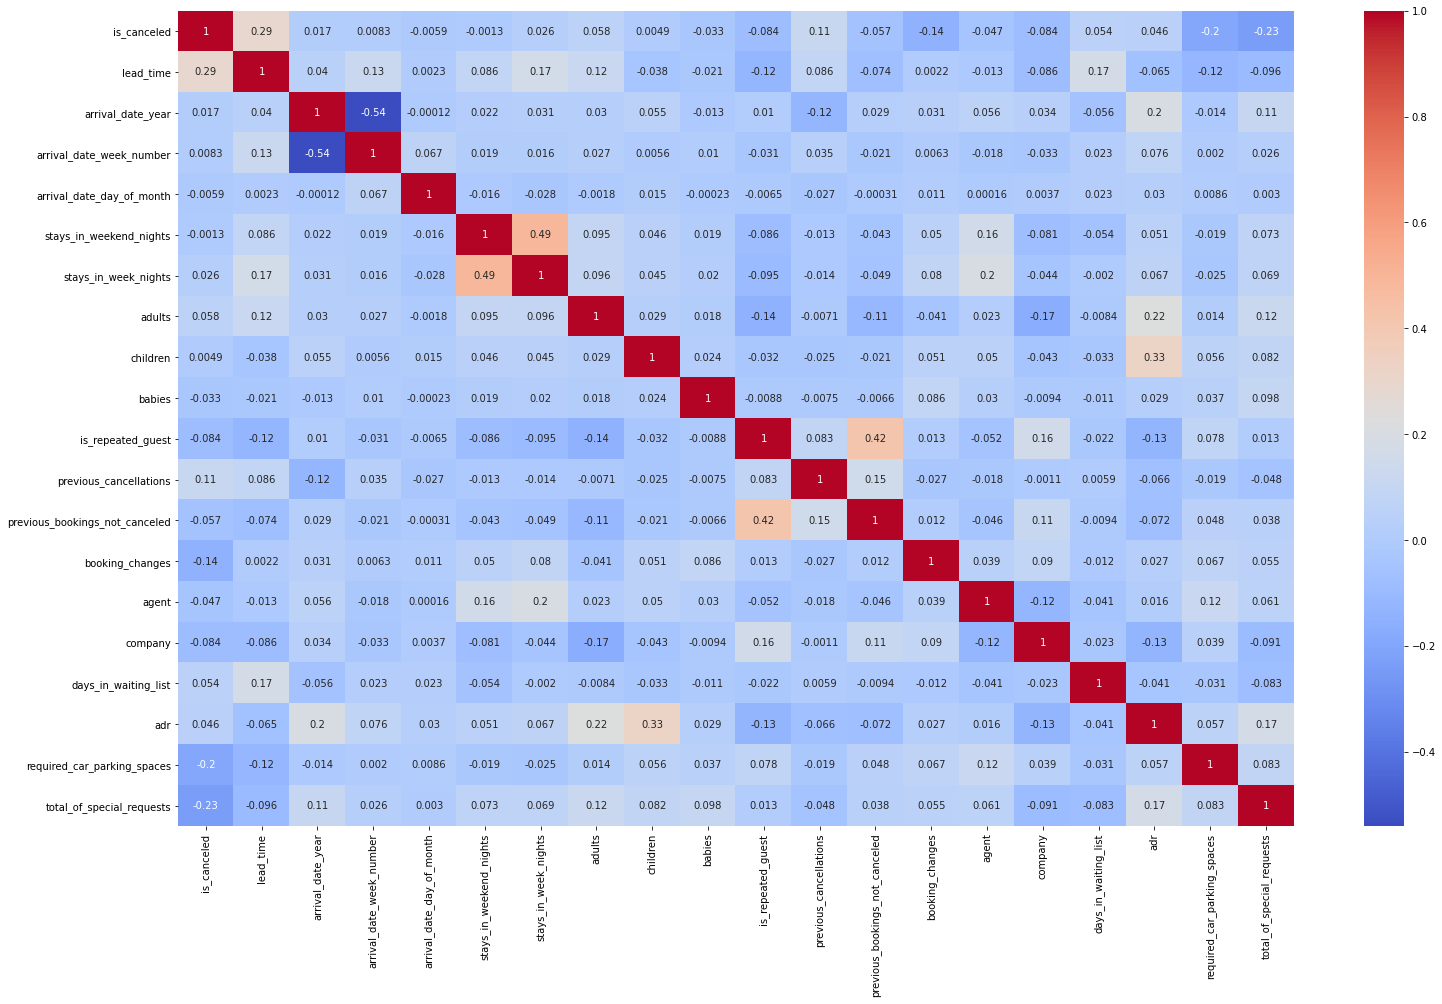

In [30]:
# Now Making Correlation heatmap

plt.figure(figsize=(25,15))
sns.heatmap(df_new.corr(), cmap="coolwarm", annot=True)

## From the above correlation heatmap it is clear that 'is_cancelled' is highly positively correlated with 'lead_time' as well as 'previous_cancellations' as compared to other features.

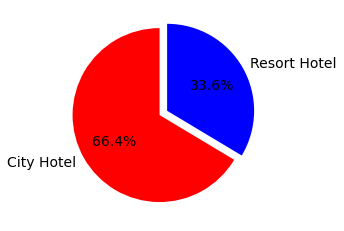

In [31]:
# Using Pie plot to show types of hotels.

labels = df_new['hotel'].value_counts().index.tolist()
sizes = df_new['hotel'].value_counts().tolist()
explode = (0, 0.10)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

# 1. Checking that From which country most guests are coming?

In [32]:
# Value counts of top 10 countries from where maximum number of bookings happened

top_10_countries = df_new[df_new['is_canceled']==0]['country'].value_counts()[:10]

In [33]:

top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [34]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,20977,33.993421
1,GBR,9668,15.667083
2,FRA,8468,13.722472
3,ESP,6383,10.343710
4,DEU,6067,9.831629
5,IRL,2542,4.119334
6,ITA,2428,3.934596
7,BEL,1868,3.027111
8,NLD,1716,2.780794
9,USA,1592,2.579851


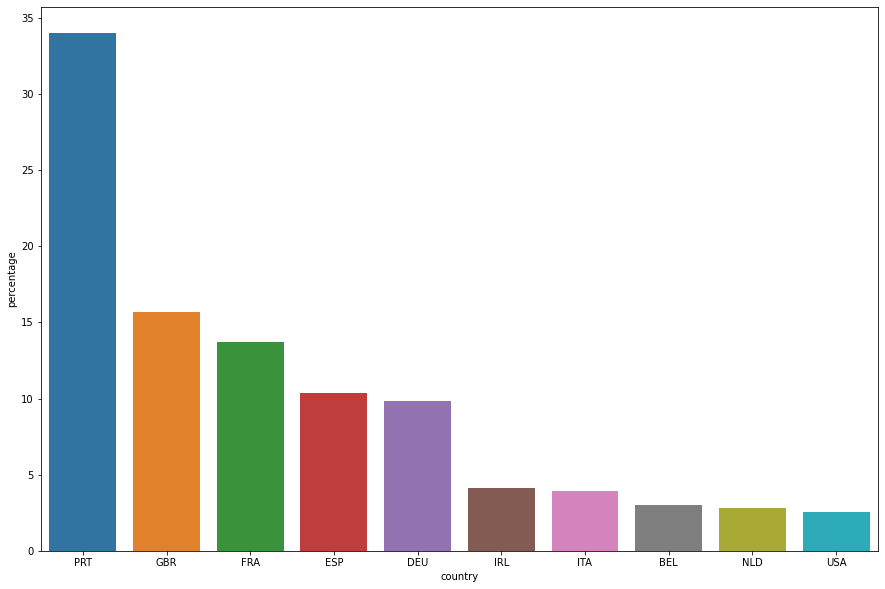

In [35]:
# Bar plot of top 10 countries

plt.figure(figsize=(15,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

### More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest.

## 2. Which month is the most occupied and which is the least occupied?

In [36]:
# value_counts counts the number of times each values has appeared

df_new.arrival_date_month.value_counts(normalize=True)

August       0.116274
July         0.106065
May          0.098817
October      0.093507
April        0.092928
June         0.091679
September    0.088080
March        0.081939
February     0.067545
November     0.056799
December     0.056698
January      0.049669
Name: arrival_date_month, dtype: float64

In [37]:
df_month = df_new[df_new['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
df_month

,month,number_of_bookings
0,August,8624
1,July,7907
2,May,7103
3,October,6901
4,March,6620
5,April,6560
6,June,6395
7,September,6385
8,February,5359
9,November,4651


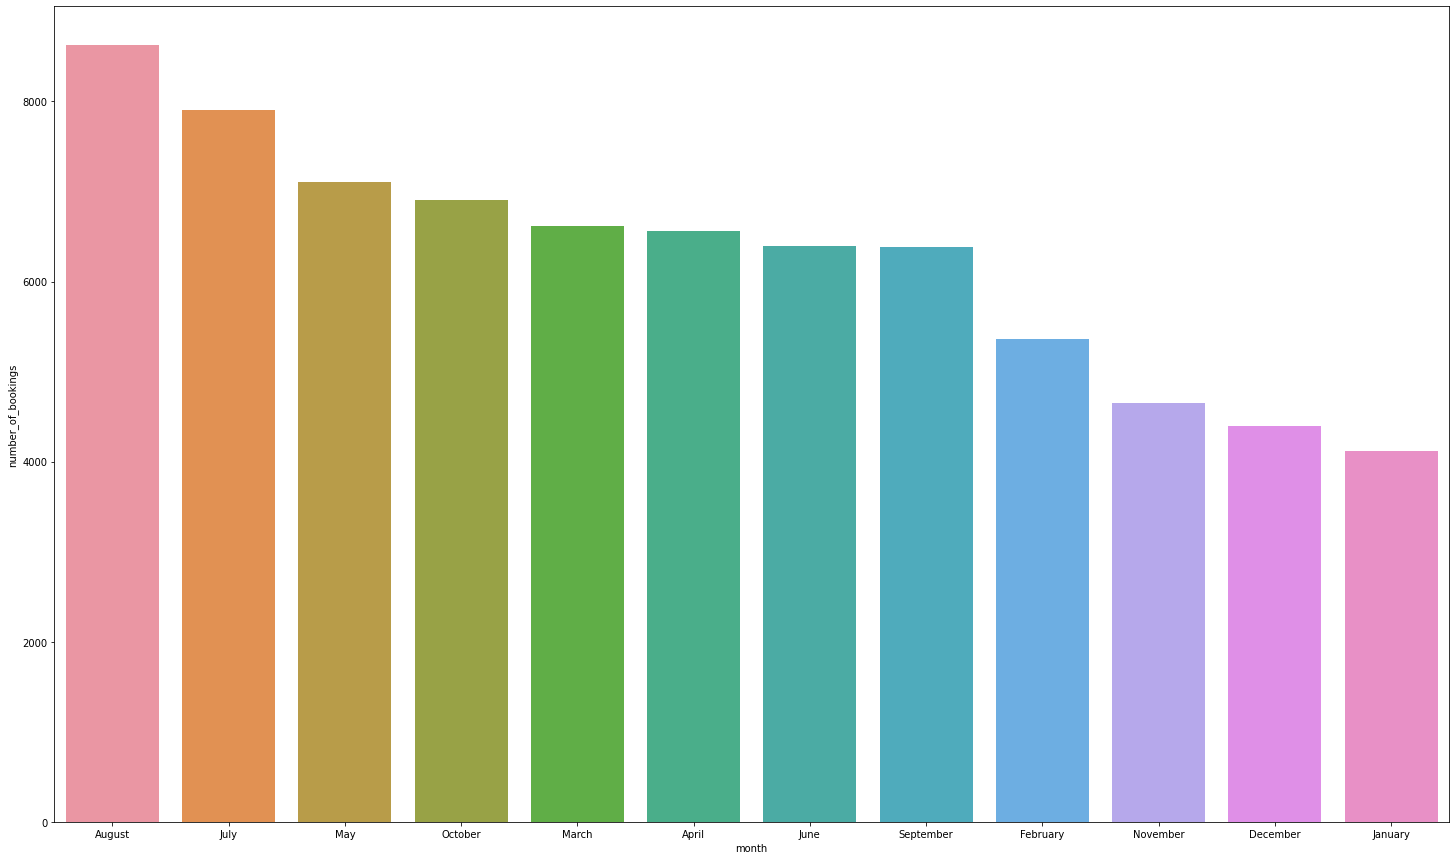

In [38]:

# Barplot of number of bookings in each month

plt.figure(figsize=(25,15))
ax = sns.barplot(x="month", y="number_of_bookings", data = df_month)

In [39]:
month_hotel_type = df_new[df_new['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4010,2550
August,5367,3257
December,2377,2014
February,3051,2308
January,2249,1866
July,4770,3137
June,4358,2037
March,4049,2571
May,4568,2535


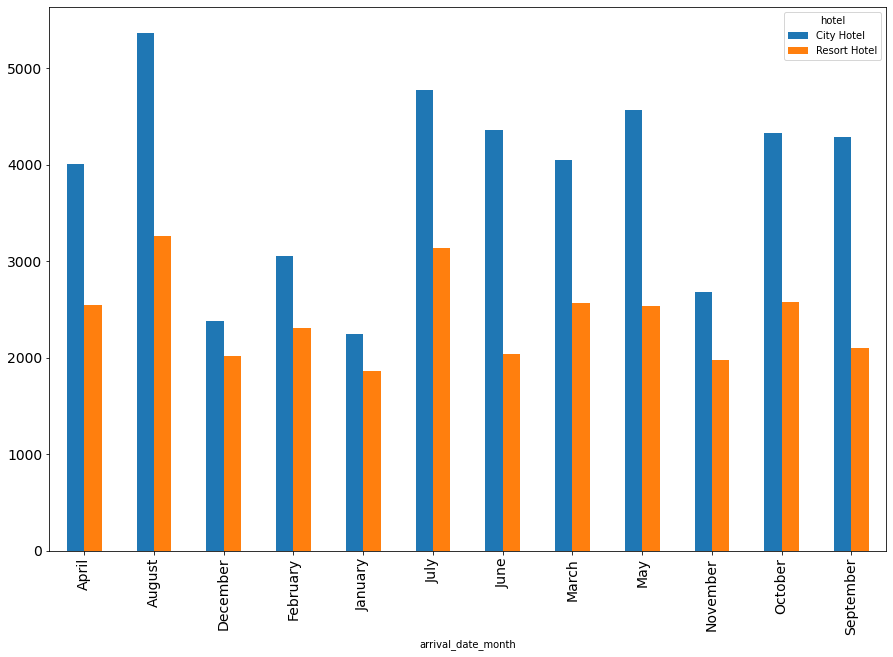

In [40]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

###It is found that, August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

## 3. How many booking got cancelled in both type of hotels ?

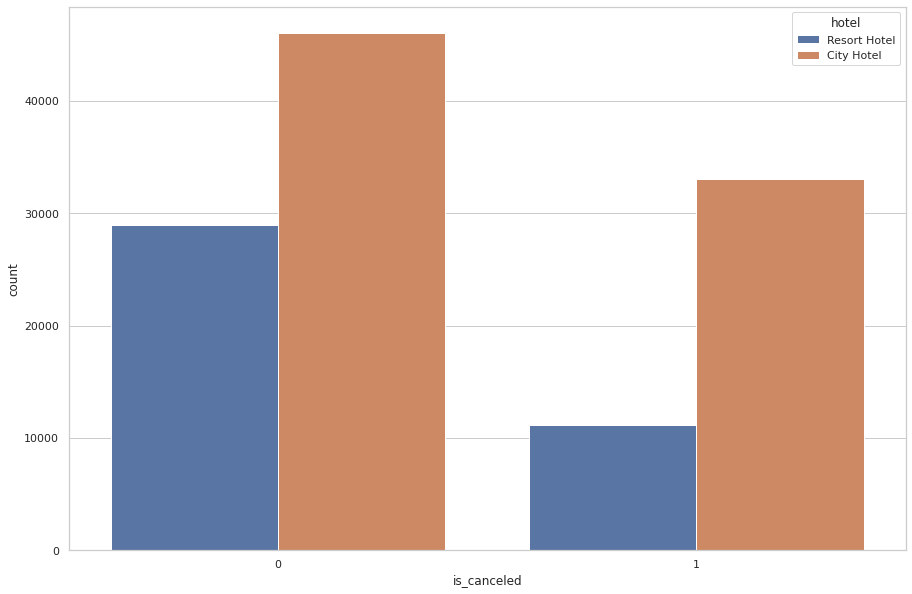

In [41]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df_new)

### In Resort hotel, booking cancellation is less as compared  to City hotel. And overall booking cancellation is low.

#4. What are the number of weekend vs weekdays night bookings for resort hotels?

In [42]:
# First we will take only not cancelled booking values

not_canceled_data = df_new[df_new['is_canceled']==0]

In [43]:
# Total number of week night stay.

week_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_week_nights'].sum()

In [44]:
# Total number of weekend night stay.

weekend_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_weekend_nights'].sum()

Text(0.5, 1.0, 'Number of bookings for week and weekend nights for Resort type hotel')

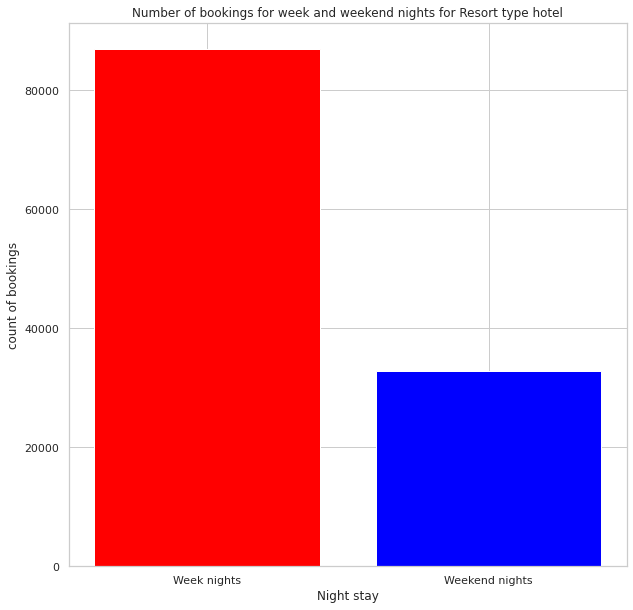

In [45]:
# Bar plot showing week nights and weekend nights stay for Resort hotels.

plt.figure(figsize=(10,10))
plt.bar(x=['Week nights','Weekend nights'],height = [week_nights,weekend_nights], color = ['red','blue'])
plt.xlabel('Night stay')
plt.ylabel('count of bookings')
plt.title('Number of bookings for week and weekend nights for Resort type hotel')

## 5. Let's check the distribution of adr.

In [46]:
# not_canceled dataframe that we have created earlier to get only those bookings which are not canceled.

not_canceled_data[not_canceled_data['adr'] == 0][not_canceled_data['market_segment']=='Complementary'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


### We have filtered our not_canceled_data dataframe on the basis of market segment as Complementary.

# adr column consist of values which are euqal to 0. However, there are few rows where we see the market segment as Complementary for all those values and it makes sense. Other than those all other values seems as an anamoly and needs to be removed.

In [47]:
# Let's filter our copied dataset and remove anamolies.

df_new= df_new.drop(df_new[(df_new['adr'] == 0) & (df_new['market_segment'] != 'Complementary')].index)

In [48]:
df_new[df_new['adr']==0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


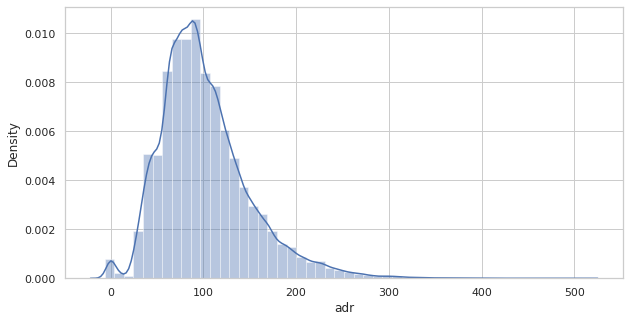

In [49]:
# Let's check distribution of adr column.

plt.figure(figsize=(10,5))
ax = sns.distplot(df_new[df_new['is_canceled']==0]['adr'])

In [50]:
# Central value of distribution.

df_new[df_new['is_canceled']==0]['adr'].median()

93.75

In [51]:
# Most occured value.

df_new[df_new['is_canceled']==0]['adr'].mode()

0    65.0
dtype: float64

In [52]:
# Average value.

df_new[df_new['is_canceled']==0]['adr'].mean()

101.5789206435013

## The above distribution plot is a right-skewed distribution, with an average adr of 100.57. Half of the adr values are less than 93.7 and the most repeated adr value is 65.

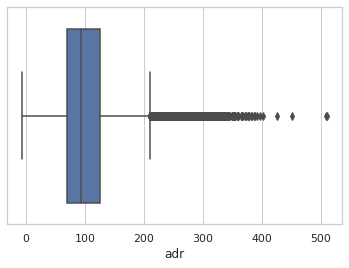

In [53]:
# Boxplot of adr column.

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_new[df_new['is_canceled']==0]['adr'])

# 6. let's check Which months have cheaper booking rates?

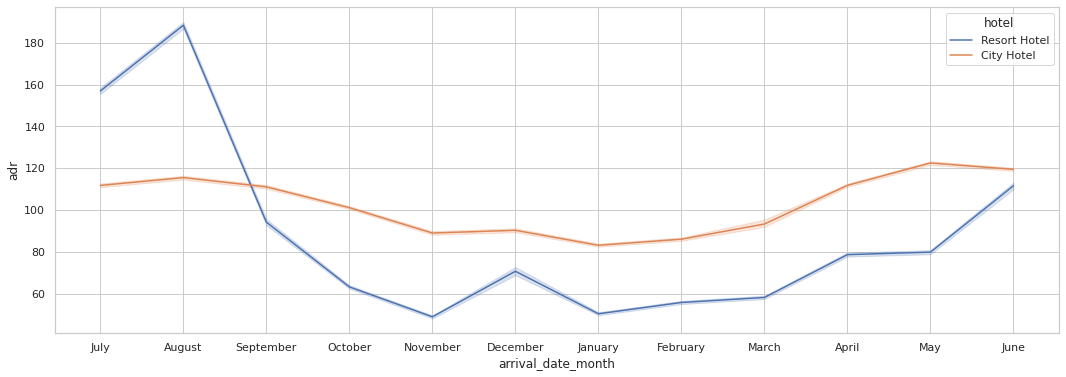

In [54]:
# Lineplot of the adr for different hotel types.

plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_new)
plt.show()

## For both city and resort hotels, November to January have cheaper average daily rates.

# 7.let's check which type of acomodation has been booked most

## **let's  check whether the booking was made for an individual or a couple or a family(A couple is a group of 2 adults and family contains people more than 2).**

In [55]:
# Filter the data on the basis of individual, couple and family.

individual = df_new[df_new['is_canceled']==0][(df_new['adults']==1) & (df_new['children'] == 0) & (df_new['babies'] == 0)]
couple = df_new[df_new['is_canceled']==0][(df_new['adults']==2) & (df_new['children'] == 0) & (df_new['babies'] == 0)]
family = df_new[df_new['is_canceled']==0][(df_new['adults'] )+ (df_new['children']) + (df_new['babies'] ) > 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [56]:
# Shape of dataset containing only not cancelled bookings.

total_count = df_new[(df_new['is_canceled']==0)].shape[0]

In [57]:
# Calculating the percentage of booking of each type of accomodations.

percentage = [round(len(item)/total_count * 100) for item in [individual,couple,family]]

In [58]:
types_of_accomodation = ['Individual','Couple','Family']

In [59]:
# Dictionary to store types of accomodation and their percentage of bookings.

dict(zip(types_of_accomodation,percentage))

{'Couple': 66, 'Family': 13, 'Individual': 21}

In [60]:
# Creating dataframe

data = pd.DataFrame({'types_of_accomodation':types_of_accomodation,'percentage':percentage})
data

,types_of_accomodation,percentage
0,Individual,21
1,Couple,66
2,Family,13


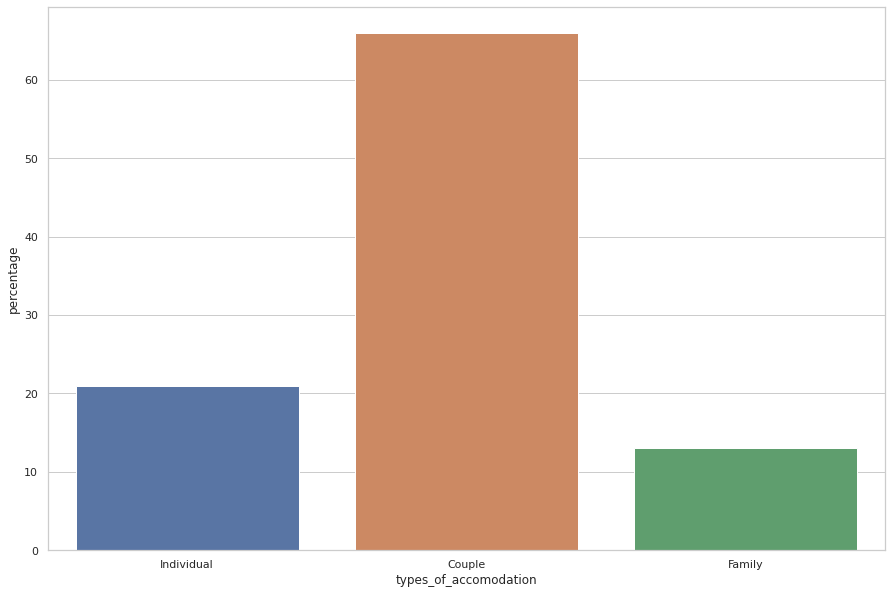

In [61]:
# Barplot of different types of accomodations.

plt.figure(figsize=(15,10))
ax = sns.barplot(x="types_of_accomodation", y="percentage", data = data)

## %age of booking is high in case of 'Couple', which means maximum number of booking made by couples in both type of hotels.

# 8. Finding number of bookings made by different market segment.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


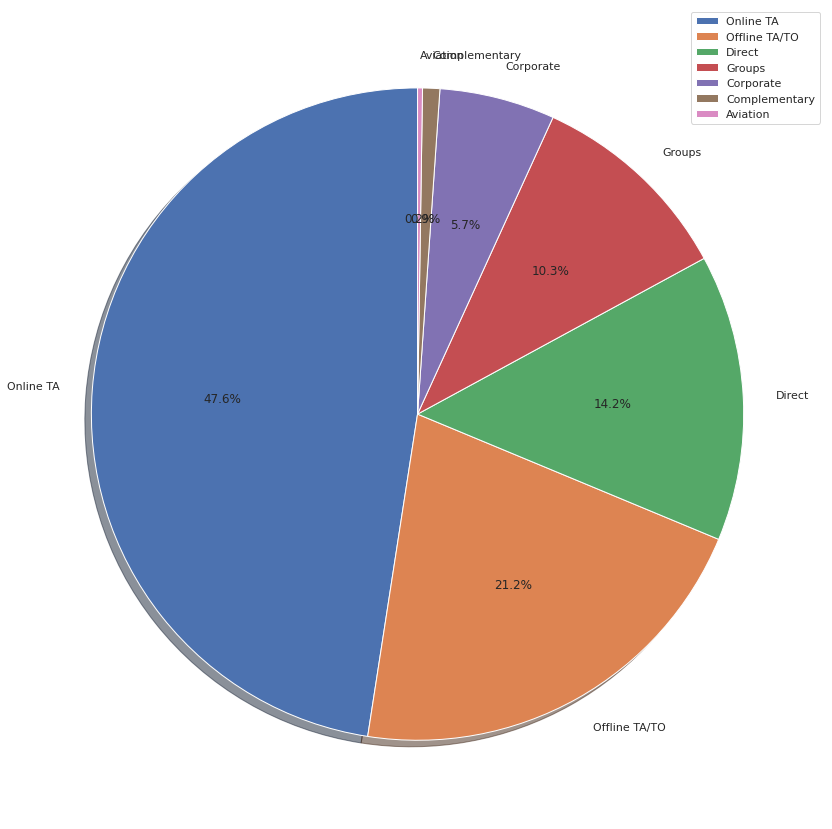

In [63]:
# Total bookings per market segment.

plt.figure(figsize = (25,15))
segments=not_canceled_data["market_segment"].value_counts()

# pie plot

ax = plt.pie(segments,
             labels=segments.index,
             autopct='%1.1f%%',
             shadow=True, startangle=90
             )

plt.legend(ax, labels = segments.index, loc="best")

## Maximum number of bookings made by Online TA, followed by Offline TA and Direct.

## 9.let's check the no of customers repeated their bookings.

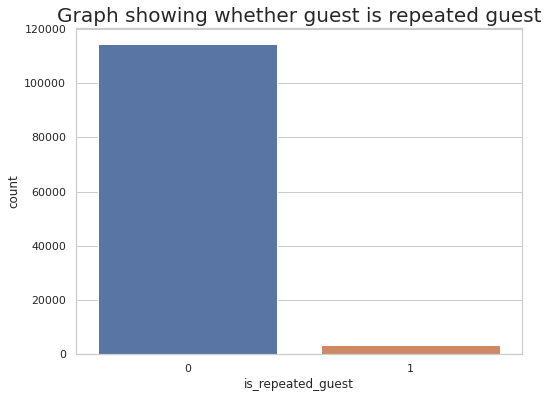

In [65]:
# Countplot of number of customers repeated their bookings.

plt.figure(figsize=(8,6))
sns.countplot(data = df_new, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

## It is clear from the above plot that most customers are not repeating their booking.

# 10. Checking for the number of customers repeated their bookings.

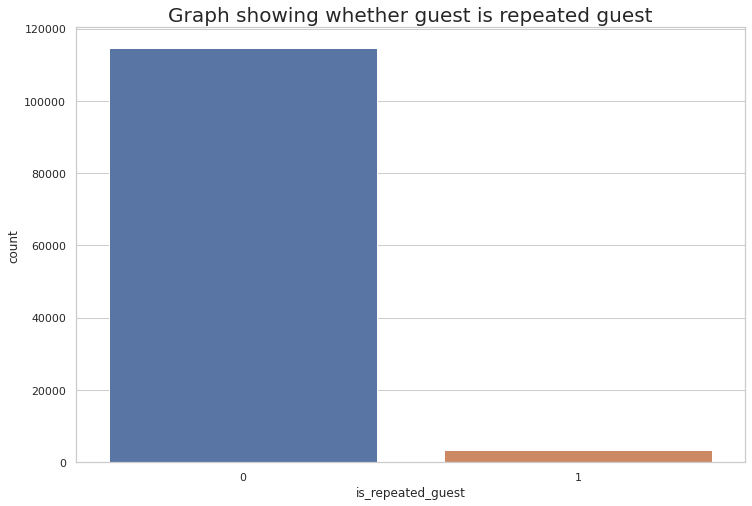

In [67]:
# Bar plot showing whether customers repeating their bookings or not?

plt.figure(figsize=(12,8))
sns.countplot(data = df_new, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

## It is found that number of repeating guests are very low.

# 11. How does lead time affect cancellation?

Text(0, 0.5, 'Cancelations [%]')

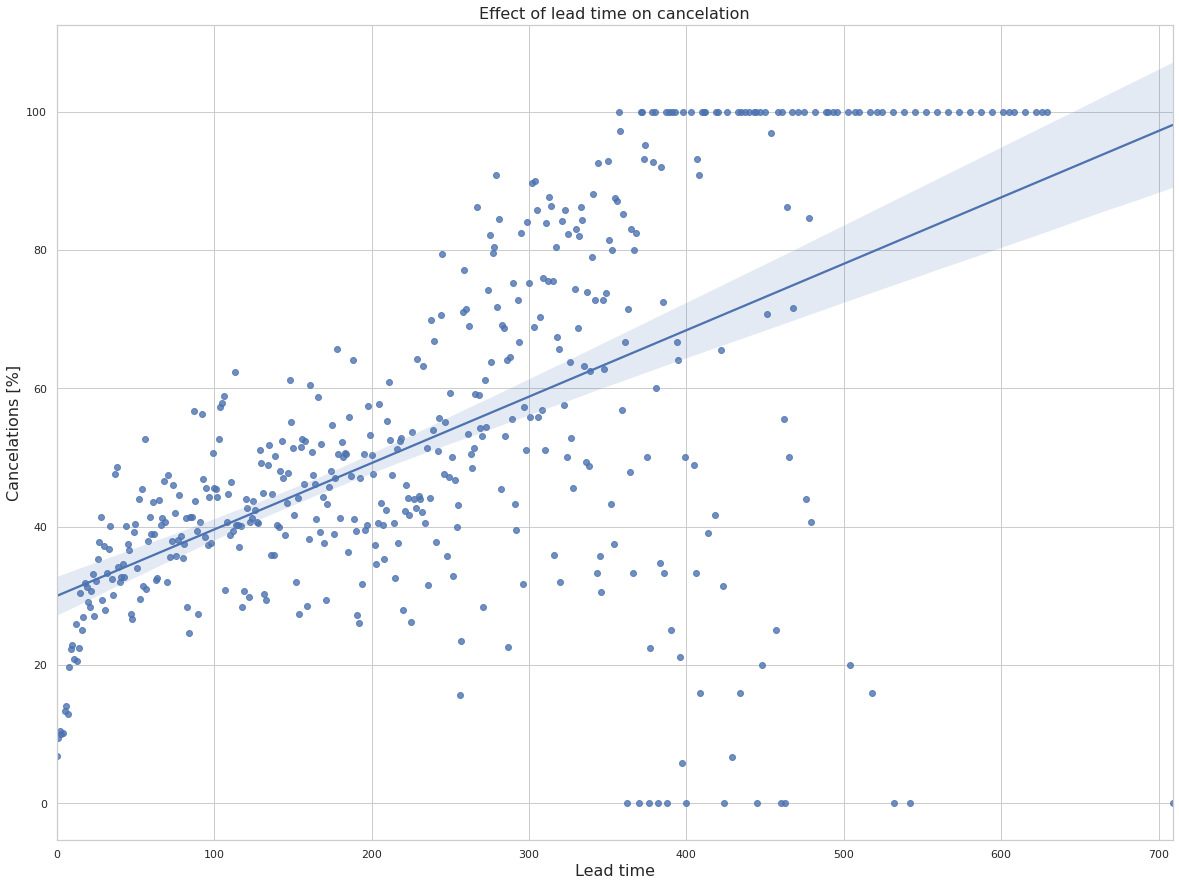

In [69]:
# Regplot showing relation between lead time and cancellation.

lead_time_df = df_new.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(20, 15))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

## It is clear from above plot  that as lead time increases, percentage of booking cancellation also increases.

# 12. How does ADR affect cancelation?

(0.0, 100.0)

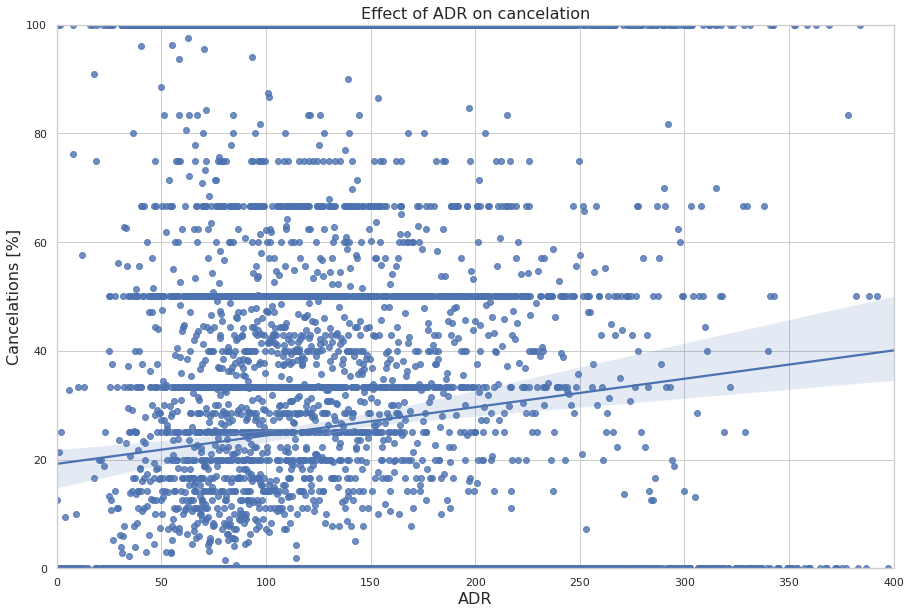

In [70]:
# Regplot showing relationship between ADR and cancellation.

adr_cancel_data = df_new.groupby("adr")["is_canceled"].describe()
plt.figure(figsize=(15, 10))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)

## It's is found correlation between ADR and cancellations is positive which means as ADR increases number of booking cancellations will also be increases.

###13.let's check no bookings made by different market segment in both type of hotels.


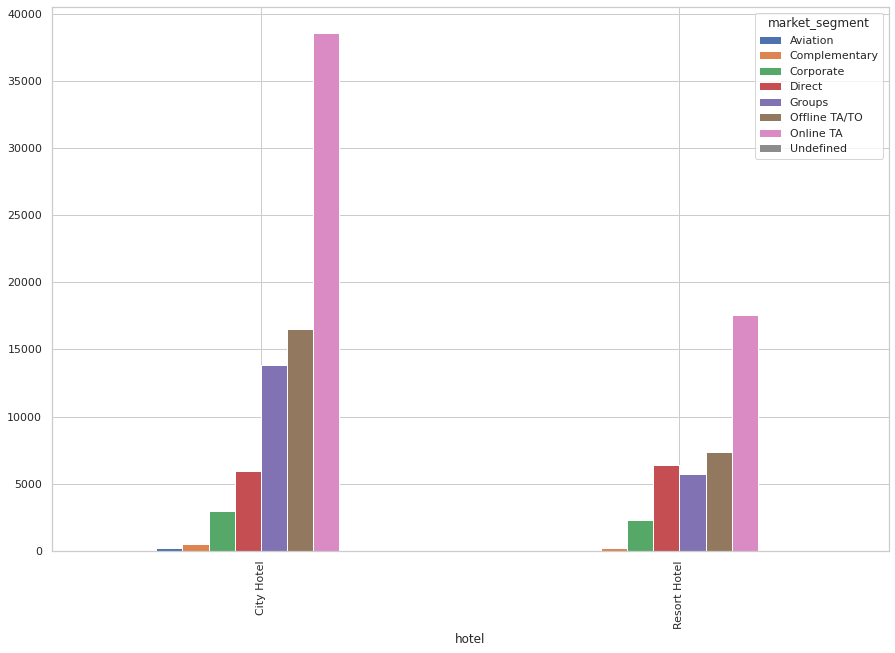

In [73]:
Market_segment_booking=df_new.groupby(['hotel','market_segment']).size().unstack()

Market_segment_booking.plot(kind='bar',figsize=(15,10))


###In both the hotels only TA has made max.number of bookings

# **Conclusions**

#1.Increase in lead time increases the rate of cancellation.
#2.Increase in Adr also increases the rate of cancellation.
#3.Customer should do their booking in during the month Novermber to january because in these months both hotels have cheaper avareage daily rate.
#4.Number of booking is greater in case of couples so hotels should focus on special requests made by couple.
